In [1]:
# Imports
from env import host, user, password
import os

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
np.random.seed(42)

In [2]:
df = w.wrangle_zillow()

csv file found and read


In [3]:
train, validate, test = w.split_function(df)
train.head()

Prepared df: (2033172, 9)

Train: (1219902, 9)
Validate: (406635, 9)
Test: (406635, 9)


,bedrooms,bathrooms,square_feet,year_built,tax_amount,county,tax_value,county_Orange,county_Ventura
789918,2,1.0,777,1946,4230,LA,350556,0,0
1696225,2,1.0,1014,1938,2567,LA,192599,0,0
1720742,3,2.0,1762,1958,5566,Orange,480000,1,0
962447,1,1.0,616,1952,1694,LA,131512,0,0
324076,3,2.0,1495,1954,1064,LA,84031,0,0


# 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution

In [4]:
to_scale = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']

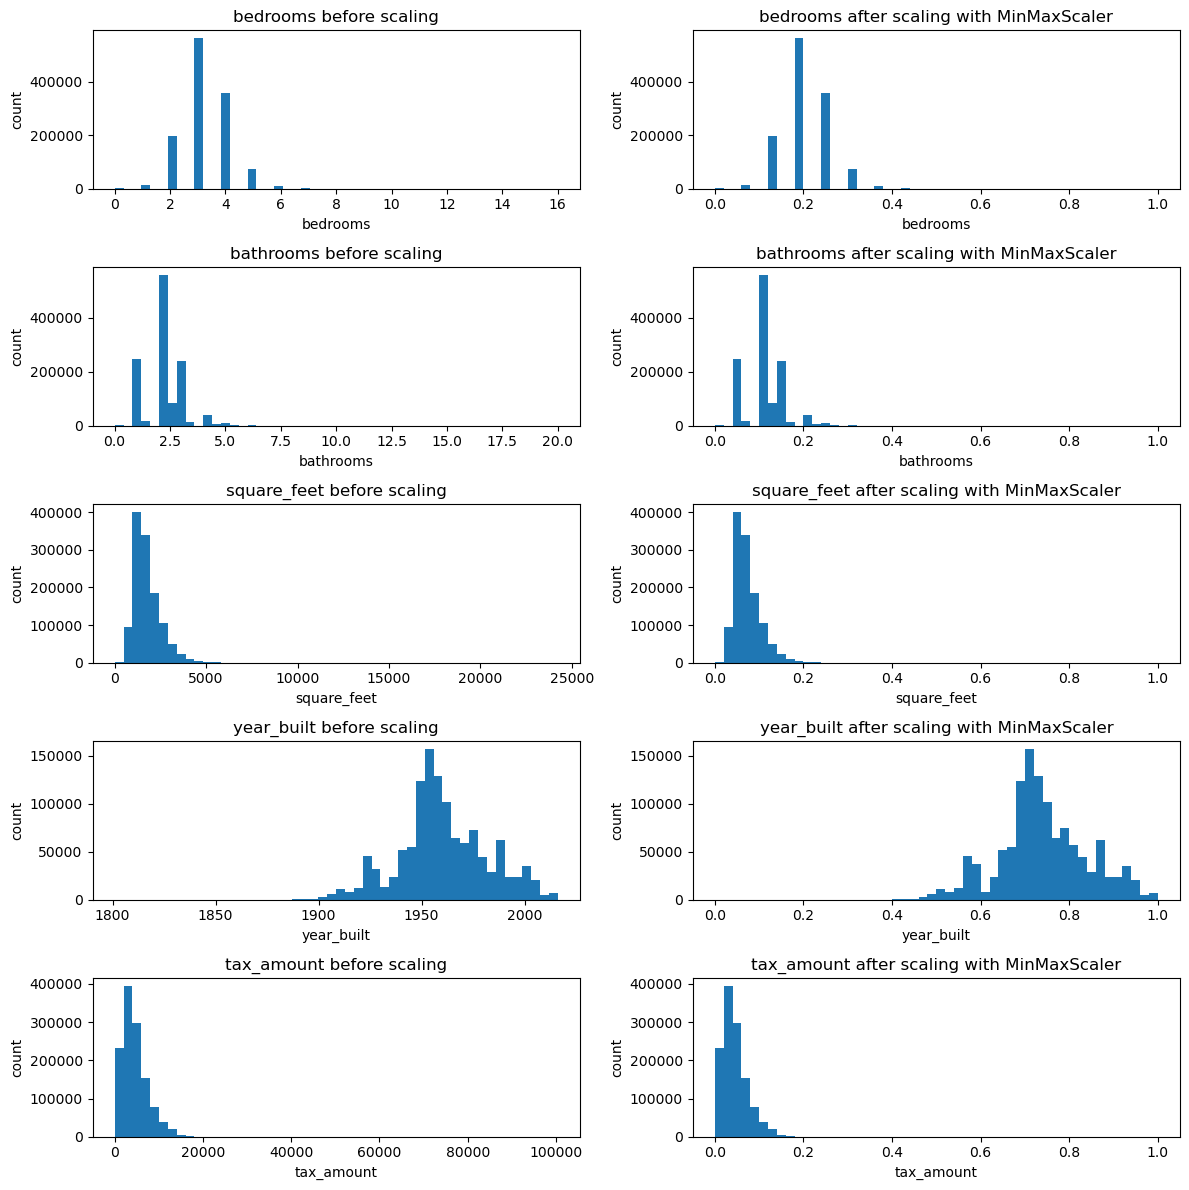

In [5]:
w.visualize_scaler(scaler=MinMaxScaler(), 
                     df=train, 
                     columns_to_scale=to_scale, 
                     bins=50)

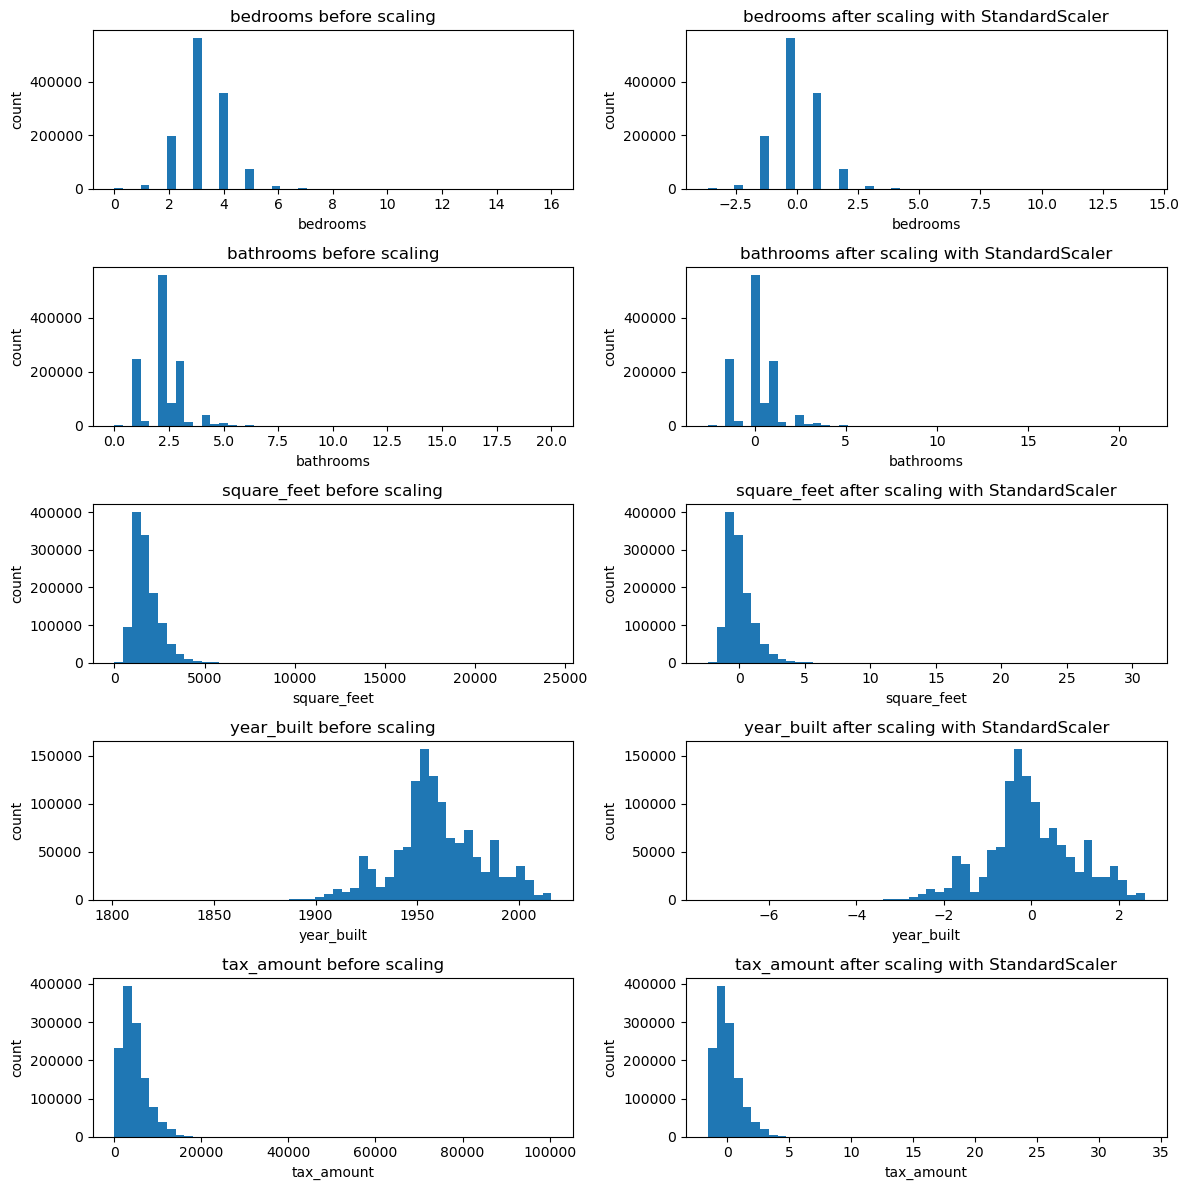

In [6]:
w.visualize_scaler(scaler=StandardScaler(), 
                     df=train, 
                     columns_to_scale=to_scale, 
                     bins=50)

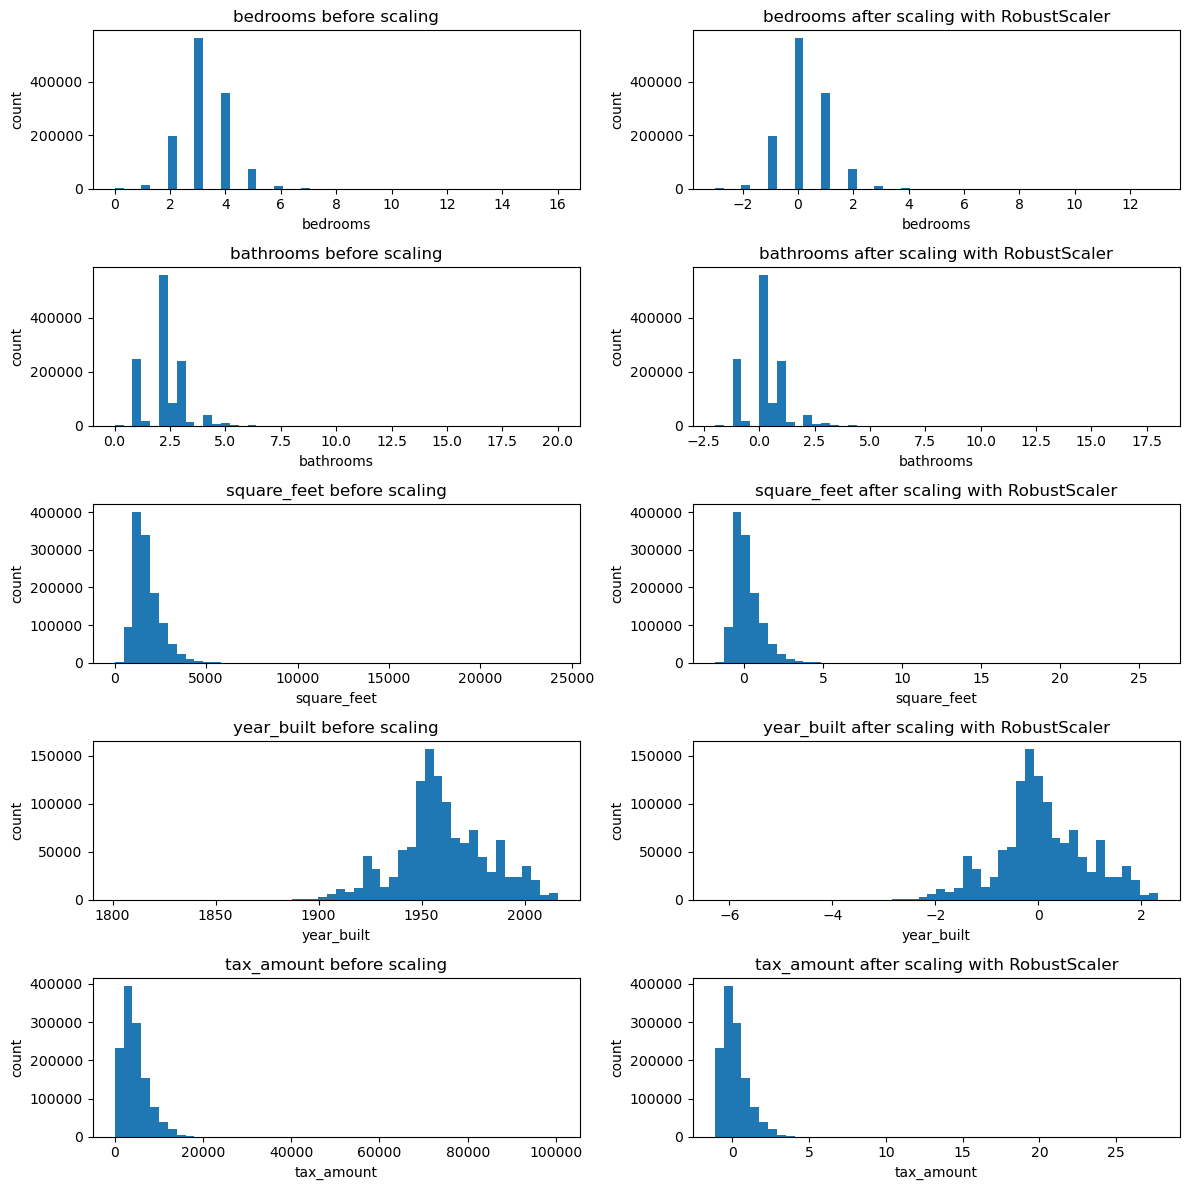

In [7]:
w.visualize_scaler(scaler=RobustScaler(), 
                     df=train, 
                     columns_to_scale=to_scale, 
                     bins=50)

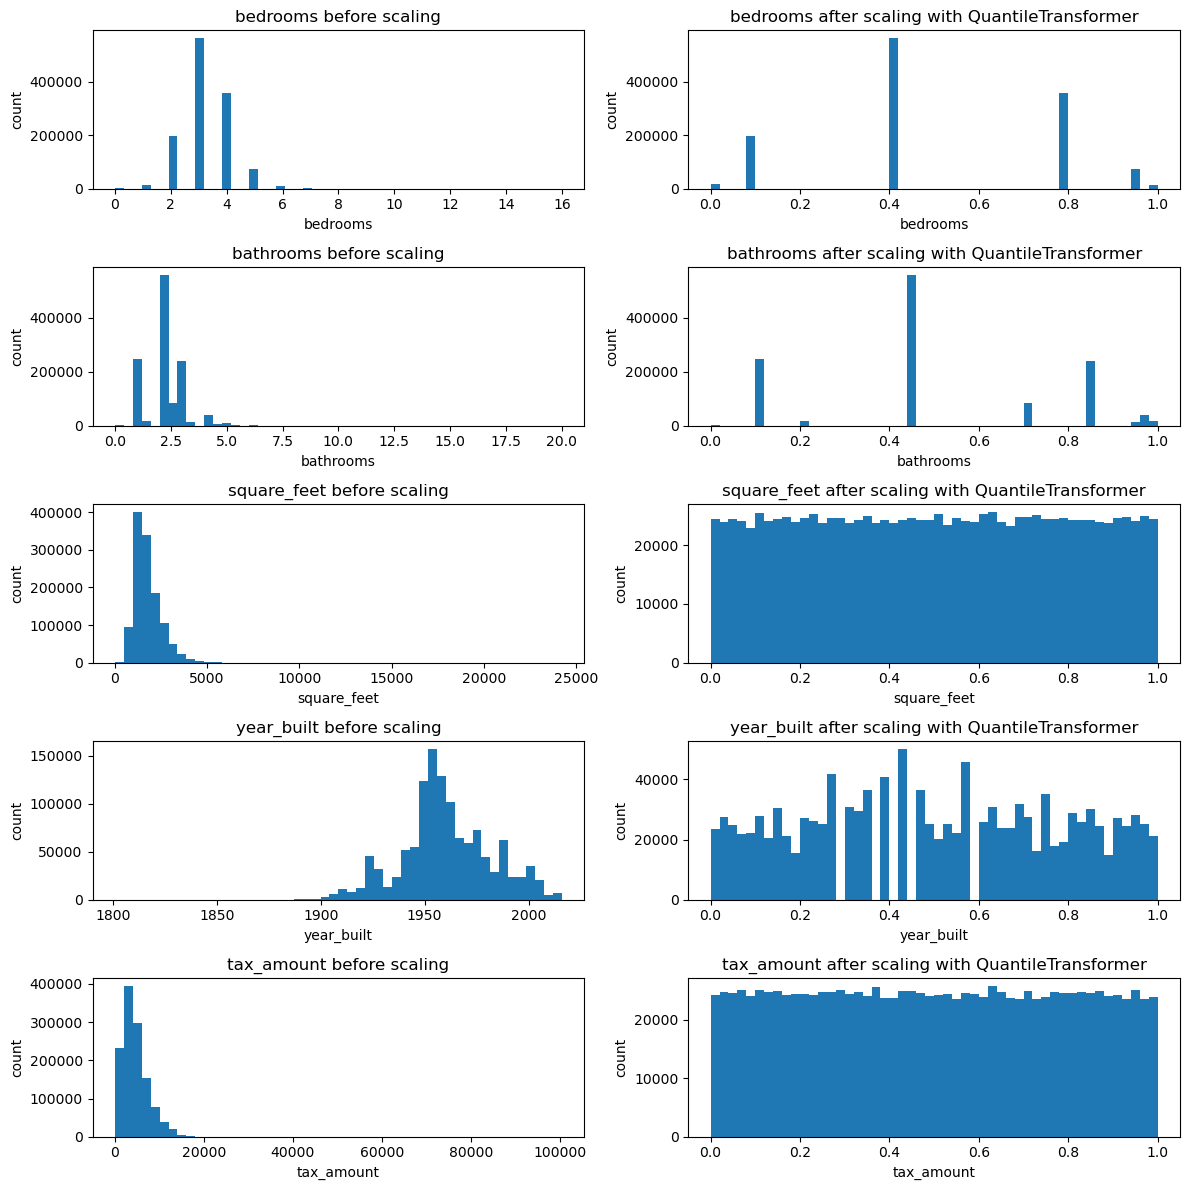

In [8]:
w.visualize_scaler(scaler=QuantileTransformer(), 
                     df=train, 
                     columns_to_scale=to_scale, 
                     bins=50)

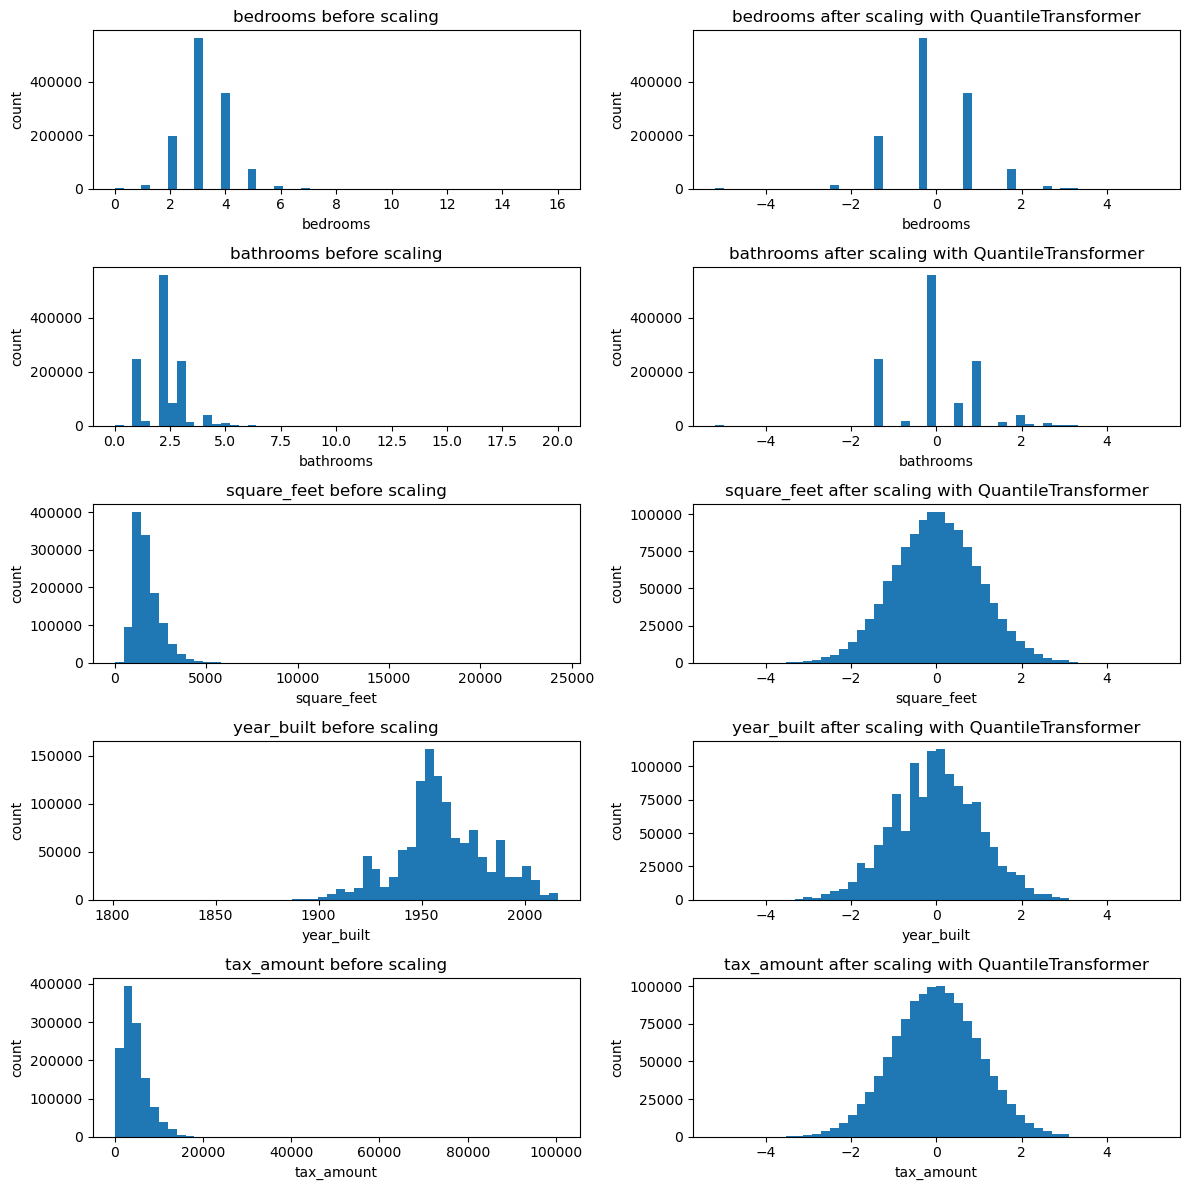

In [9]:
w.visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                     df=train, 
                     columns_to_scale=to_scale, 
                     bins=50)

In [10]:
def get_minmax_scaled (train, validate, test, columns_to_scale):
    """ 
    This function will
    - accept train, validate, test, and which columns are to be scaled
    - makes minmax scaler, fits scaler on train columns
    - returns 3 scaled dataframes; one for train/validate/test
    """
    # make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    # make and fit minmax scaler
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])

    # use the thing
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    validate_scaled[columns_to_scale] = scaler.transform(validate[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [5]:
train_scaled, validate_scaled, test_scaled = w.get_minmax_scaled(train, validate, test, to_scale)

In [12]:
train.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county,tax_value,county_Orange,county_Ventura
789918,2,1.0,777,1946,4230,LA,350556,0,0
1696225,2,1.0,1014,1938,2567,LA,192599,0,0
1720742,3,2.0,1762,1958,5566,Orange,480000,1,0
962447,1,1.0,616,1952,1694,LA,131512,0,0
324076,3,2.0,1495,1954,1064,LA,84031,0,0


In [13]:
train_scaled.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county,tax_value,county_Orange,county_Ventura
789918,0.1250,0.05,0.032041,0.674419,0.042016,LA,350556,0,0
1696225,0.1250,0.05,0.041827,0.637209,0.025447,LA,192599,0,0
1720742,0.1875,0.10,0.072712,0.730233,0.055328,Orange,480000,1,0
962447,0.0625,0.05,0.025393,0.702326,0.016749,LA,131512,0,0
324076,0.1875,0.10,0.061687,0.711628,0.010472,LA,84031,0,0


In [6]:
# visualizing original and scaled columns
def get_scaled_visuals(train, train_scaled, columns_to_visualize):
    """
    This function will
    - accept train and train_scaled and which columns to visualize
    - utilize plt.hist to visualize the orginal and the scaled values
    """
    for col in columns_to_visualize:
        plt.figure(figsize=(13,6))

        plt.subplot(121)
        plt.hist(train[col])
        plt.title('Original')
        plt.xlabel(col)

        plt.subplot(122)
        plt.hist(train_scaled[col])
        plt.title('Scaled')
        plt.xlabel(col)

        plt.show()

## Visuals for MinMaxScaler
### I wrote all this code and then decided Misty's example function was much better. So I copied it, put it into my wrangle file, and used it above.

# BL: Disregard code for visualization below this line

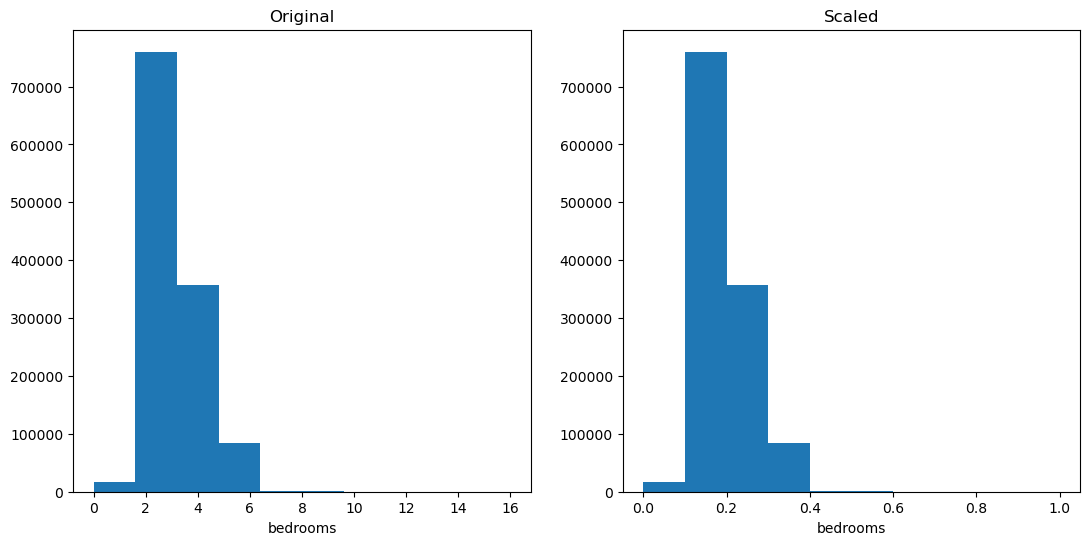

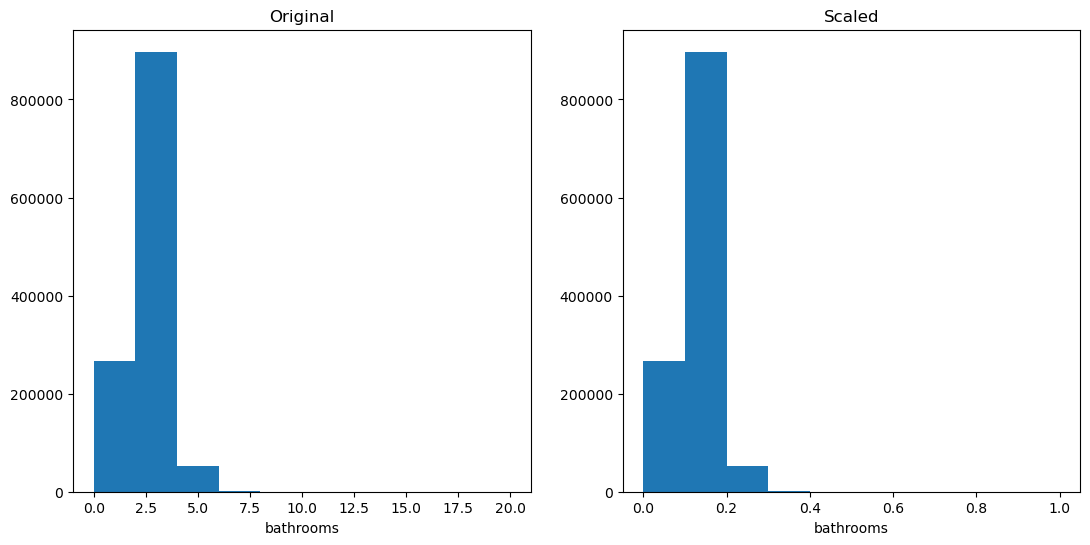

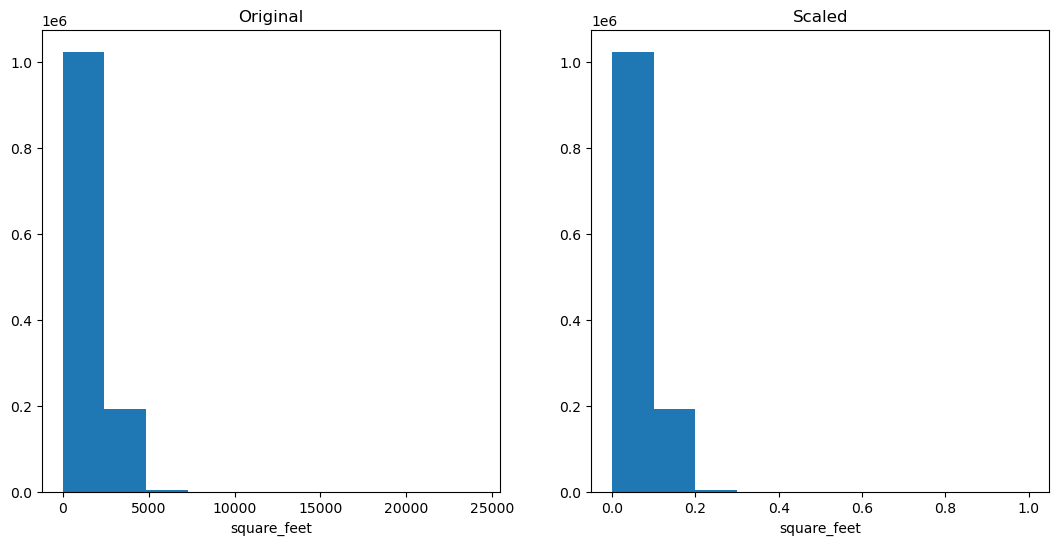

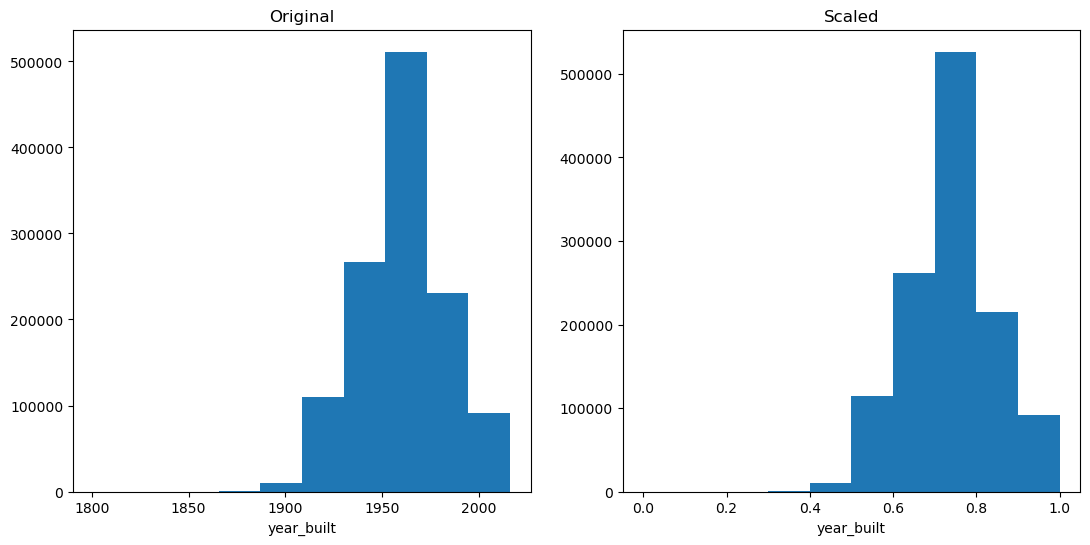

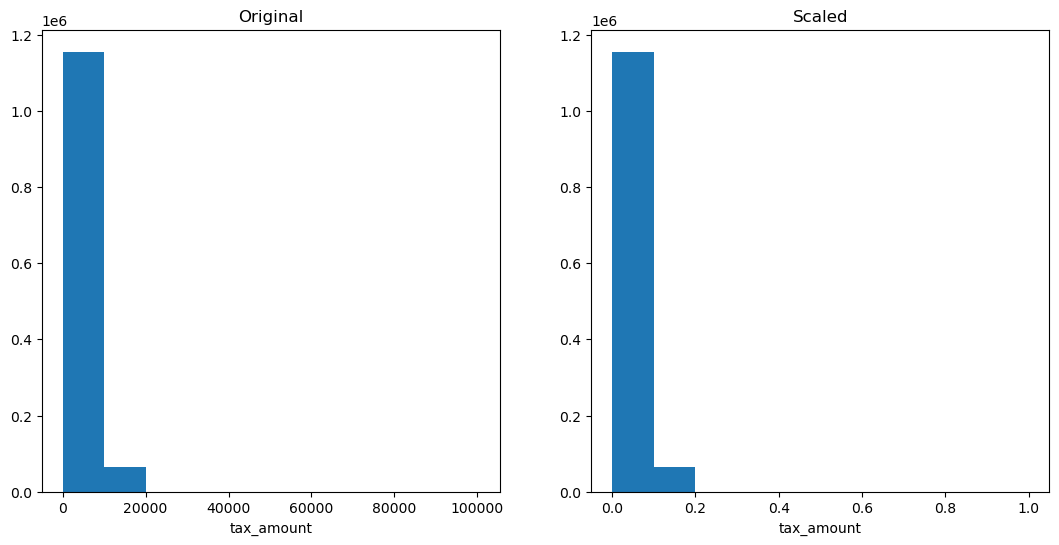

In [7]:
get_scaled_visuals(train, train_scaled, to_scale)

In [16]:
def get_standard_scaled_X (X_train, X_validate, X_test):
    """ 
    This function will
    - accept X_train/validate/test ready for scaling
    - makes minmax scaler, fits scaler on X_train
    - returns 3 scaled dataframes; one for X_train/validate/test
    """
    # make and fit minmax scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    # set columns
    cols = X_train.columns

    # initialize scaled dataframes
    X_train_scaled = pd.DataFrame(columns=cols)
    X_validate_scaled = pd.DataFrame(columns=cols)
    X_test_scaled = pd.DataFrame(columns=cols)

    X_train_scaled[cols] = scaler.transform(X_train).copy()
    X_validate_scaled[cols] = scaler.transform(X_validate).copy()
    X_test_scaled[cols] = scaler.transform(X_test).copy()
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [17]:
X_train_scaled, X_validate_scaled, X_test_scaled = get_standard_scaled_X (X_train[columns_to_scale],
                                                                X_validate[columns_to_scale],
                                                                X_test[columns_to_scale])
X_train_scaled.describe()

NameError: name 'X_train' is not defined

## Visuals for StandardScaler

In [ ]:
get_scaled_visuals(X_train[columns_to_scale], X_train_scaled)

In [ ]:
def get_robust_scaled_X (X_train, X_validate, X_test):
    """ 
    This function will
    - accept X_train/validate/test ready for scaling
    - makes minmax scaler, fits scaler on X_train
    - returns 3 scaled dataframes; one for X_train/validate/test
    """
    # make and fit minmax scaler
    scaler = RobustScaler()
    scaler.fit(X_train)
    
    # set columns
    cols = X_train.columns

    # initialize scaled dataframes
    X_train_scaled = pd.DataFrame(columns=cols)
    X_validate_scaled = pd.DataFrame(columns=cols)
    X_test_scaled = pd.DataFrame(columns=cols)

    X_train_scaled[cols] = scaler.transform(X_train).copy()
    X_validate_scaled[cols] = scaler.transform(X_validate).copy()
    X_test_scaled[cols] = scaler.transform(X_test).copy()
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_validate_scaled, X_test_scaled = get_robust_scaled_X (X_train[columns_to_scale],
                                                                X_validate[columns_to_scale],
                                                                X_test[columns_to_scale])
X_train_scaled.describe()

## Visuals for RobustScaler

In [ ]:
get_scaled_visuals(X_train[columns_to_scale], X_train_scaled)

# THIS IS USEFUL AGAIN

# 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

## Answer: Looks very similar except all data types are now floats

In [18]:
# looking at .inverse_transform; 
# first need to get a scaler and scale data (previously this is all done inside functions)

# set columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']

# make and fit minmax scaler
scaler = RobustScaler()
scaler.fit(train[cols])

# initialize scaled dataframes
X_train_scaled = pd.DataFrame(columns=cols)
X_validate_scaled = pd.DataFrame(columns=cols)
X_test_scaled = pd.DataFrame(columns=cols)

X_train_scaled[cols] = scaler.transform(train[cols]).copy()
X_validate_scaled[cols] = scaler.transform(validate[cols]).copy()
X_test_scaled[cols] = scaler.transform(test[cols]).copy()

In [19]:
train.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county,tax_value,county_Orange,county_Ventura
789918,2,1.0,777,1946,4230,LA,350556,0,0
1696225,2,1.0,1014,1938,2567,LA,192599,0,0
1720742,3,2.0,1762,1958,5566,Orange,480000,1,0
962447,1,1.0,616,1952,1694,LA,131512,0,0
324076,3,2.0,1495,1954,1064,LA,84031,0,0


In [20]:
X_train_scaled.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount
0,-1.0,-1.0,-0.937500,-0.48,0.084458
1,-1.0,-1.0,-0.663194,-0.80,-0.393278
2,0.0,0.0,0.202546,0.00,0.468256
3,-2.0,-1.0,-1.123843,-0.24,-0.644068
4,0.0,0.0,-0.106481,-0.16,-0.825050


In [21]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219902 entries, 0 to 1219901
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1219902 non-null  float64
 1   bathrooms    1219902 non-null  float64
 2   square_feet  1219902 non-null  float64
 3   year_built   1219902 non-null  float64
 4   tax_amount   1219902 non-null  float64
dtypes: float64(5)
memory usage: 46.5 MB


In [22]:
inverse_df = pd.DataFrame(columns=cols)
inverse_df[cols] = scaler.inverse_transform(X_train_scaled)

In [23]:
inverse_df.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount
0,2.0,1.0,777.0,1946.0,4230.0
1,2.0,1.0,1014.0,1938.0,2567.0
2,3.0,2.0,1762.0,1958.0,5566.0
3,1.0,1.0,616.0,1952.0,1694.0
4,3.0,2.0,1495.0,1954.0,1064.0


In [24]:
inverse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219902 entries, 0 to 1219901
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1219902 non-null  float64
 1   bathrooms    1219902 non-null  float64
 2   square_feet  1219902 non-null  float64
 3   year_built   1219902 non-null  float64
 4   tax_amount   1219902 non-null  float64
dtypes: float64(5)
memory usage: 46.5 MB


# 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the ouput_distribution and apply this scaler to your data. Visualize the result of your data scaling.

# 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

## See Above (Disregard code below)

In [ ]:
scaler = QuantileTransformer(output_distribution='normal')

In [ ]:
scaler.fit(X_train[cols])

In [ ]:
# set columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']

# initialize scaled dataframes
X_train_scaled = pd.DataFrame(columns=cols)
X_validate_scaled = pd.DataFrame(columns=cols)
X_test_scaled = pd.DataFrame(columns=cols)

X_train_scaled[cols] = scaler.transform(X_train[cols]).copy()
X_validate_scaled[cols] = scaler.transform(X_validate[cols]).copy()
X_test_scaled[cols] = scaler.transform(X_test[cols]).copy()

In [ ]:
get_scaled_visuals(X_train[cols], X_train_scaled)

In [ ]:
X_train_scaled.describe()

In [ ]:
scaler = QuantileTransformer(output_distribution='uniform')
scaler.fit(X_train[cols])

In [ ]:
# set columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount']

# initialize scaled dataframes
X_train_scaled = pd.DataFrame(columns=cols)
X_validate_scaled = pd.DataFrame(columns=cols)
X_test_scaled = pd.DataFrame(columns=cols)

X_train_scaled[cols] = scaler.transform(X_train[cols]).copy()
X_validate_scaled[cols] = scaler.transform(X_validate[cols]).copy()
X_test_scaled[cols] = scaler.transform(X_test[cols]).copy()

In [ ]:
get_scaled_visuals(X_train[cols], X_train_scaled)

# Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

## I think MinMaxScaler looks good.

### Code is above for the function: get_minmax_scaled